In [220]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [221]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [222]:
head(airbnb)


,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [223]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

colnames(airbnb) <- newnames
colnames(airbnb)


[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [224]:
metrosPies <-0.092903
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados*metrosPies
head(airbnb[c("PiesCuadrados",'MetrosCuadrados')])


,PiesCuadrados,MetrosCuadrados
,<int>,<dbl>
1,NA,NA
2,NA,NA
3,NA,NA
4,NA,NA
5,538,49.98181
6,NA,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [225]:
airbnb$CodigoPostal[airbnb$CodigoPostal == ''] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "-" |  airbnb$CodigoPostal == "28"] <- NA 
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n20882"] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"] <- "28051"
airbnb$CodigoPostal[airbnb$CodigoPostal == "Madrid 28004" | airbnb$CodigoPostal == "2804"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"] <- "28005"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815" | airbnb$CodigoPostal == "2015"] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal == "280013"] <- "28013"
airbnb$CodigoPostal[grep("^20", airbnb$CodigoPostal)] <- NA
airbnb$CodigoPostal[grep("^27", airbnb$CodigoPostal)] <- NA
airbnb$CodigoPostal <- droplevels(airbnb$CodigoPostal)




Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [226]:
paste("Los códigos postales existentes son:")
paste(levels(airbnb$CodigoPostal), collapse ="-|-")


[1] "Los códigos postales existentes son:"

[1] "25008-|-28001-|-28002-|-28003-|-28004-|-28005-|-28006-|-28007-|-28008-|-28009-|-28010-|-28011-|-28012-|-28013-|-28014-|-28015-|-28016-|-28017-|-28018-|-28019-|-28020-|-28021-|-28022-|-28023-|-28024-|-28025-|-28026-|-28027-|-28028-|-28029-|-28030-|-28031-|-28032-|-28033-|-28034-|-28035-|-28036-|-28037-|-28038-|-28039-|-28040-|-28041-|-28042-|-28043-|-28044-|-28045-|-28046-|-28047-|-28048-|-28049-|-28050-|-28051-|-28052-|-28053-|-28054-|-28055-|-28056-|-28058-|-28060-|-28094-|-28105-|-28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [227]:
paste("Los 5 códigos postales con mas entradas son:")
head(sort(summary(airbnb$CodigoPostal), decreasing = T),5)

paste("Los 5 códigos postales con menos entradas son:")
tail(sort(summary(airbnb$CodigoPostal), decreasing = T),5)



[1] "Los 5 códigos postales con mas entradas son:"

28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630

[1] "Los 5 códigos postales con menos entradas son:"

28058 28060 28094 28105 28850 
    1     1     1     1     1

¿Cuales son los barrios que hay en el código postal 28012?

In [228]:
paste("Los barrios que hay en el código postal 28012 son:")
barrios <- factor(airbnb[airbnb$CodigoPostal == "28012", "Barrio"])
paste(levels(barrios), collapse = ",  ")



[1] "Los barrios que hay en el código postal 28012 son:"

[1] "Acacias,  Arapiles,  Atocha,  Cortes,  Delicias,  Embajadores,  Goya,  Palacio,  Palos de Moguer,  Sol,  Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [229]:
paste ("Número de entradas por barrio:")
sort(summary(na.omit(barrios)), decreasing= T)



[1] "Número de entradas por barrio:"

Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 
        Acacias     Universidad        Arapiles          Atocha        Delicias 
             13               4               1               1               1 
           Goya 
              1

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [230]:
paste("Número de barrios en todo el dataset: ", length(levels(airbnb$Barrio)))
paste(levels(airbnb$Barrio), collapse= ",  ")


[1] "Número de barrios en todo el dataset:  125"

[1] "Abrantes,  Acacias,  Adelfas,  Aeropuerto,  Aguilas,  Alameda de Osuna,  Almagro,  Almenara,  Almendrales,  Aluche,  Ambroz,  Amposta,  Apostol Santiago,  Arapiles,  Aravaca,  Arcos,  Argüelles,  Atocha,  Bellas Vistas,  Berruguete,  Buenavista,  Butarque,  Campamento,  Canillas,  Canillejas,  Cármenes,  Casa de Campo,  Casco Histórico de Barajas,  Casco Histórico de Vallecas,  Casco Histórico de Vicálvaro,  Castellana,  Castilla,  Castillejos,  Chopera,  Ciudad Jardín,  Ciudad Universitaria,  Colina,  Comillas,  Concepción,  Corralejos,  Cortes,  Costillares,  Cuatro Caminos,  Cuatro Vientos,  Delicias,  El Goloso,  El Plantío,  El Viso,  Embajadores,  Entrevías,  Estrella,  Fontarrón,  Fuente del Berro,  Fuentelareina,  Gaztambide,  Goya,  Guindalera,  Hellín,  Hispanoamérica,  Ibiza,  Imperial,  Jerónimos,  Justicia,  La Paz,  Legazpi,  Lista,  Los Angeles,  Los Rosales,  Lucero,  Marroquina,  Media Legua,  Mirasierra,  Moscardó,  Niño Jesús,  Nueva España,  Numancia,  Opañel,  Orcasitas,  Orcasur,  Pacífico,  Palacio,  Palomas,  Palomeras Bajas,  Palomeras Sureste,  Palos de Moguer,  Pavones,  Peñagrande,  Pilar,  Pinar del Rey,  Piovera,  Portazgo,  Pradolongo,  Prosperidad,  Pueblo Nuevo,  Puerta Bonita,  Puerta del Angel,  Quintana,  Recoletos,  Rejas,  Rios Rosas,  Rosas,  Salvador,  San Andrés,  San Cristobal,  San Diego,  San Fermín,  San Isidro,  San Juan Bautista,  San Pascual,  Santa Eugenia,  Simancas,  Sol,  Timón,  Trafalgar,  Universidad,  Valdeacederas,  Valdefuentes,  Valdemarín,  Valdezarza,  Vallehermoso,  Valverde,  Ventas,  Vinateros,  Vista Alegre,  Zofío"

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [231]:
paste("Los 5 barrios con mayor entradas: ")
head(summary(airbnb$Barrio),5)

[1] "Los 5 barrios con mayor entradas: "

Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [232]:
paste("Número de tipo de alquileres: ", length(unique(airbnb$TipoAlquiler)))
paste("Que son:")
levels(airbnb$TipoAlquiler)
paste("Con las siguientes entradas:")
summary(airbnb$TipoAlquiler)


[1] "Número de tipo de alquileres:  3"

[1] "Que son:"

[1] "Entire home/apt" "Private room"    "Shared room"

[1] "Con las siguientes entradas:"

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


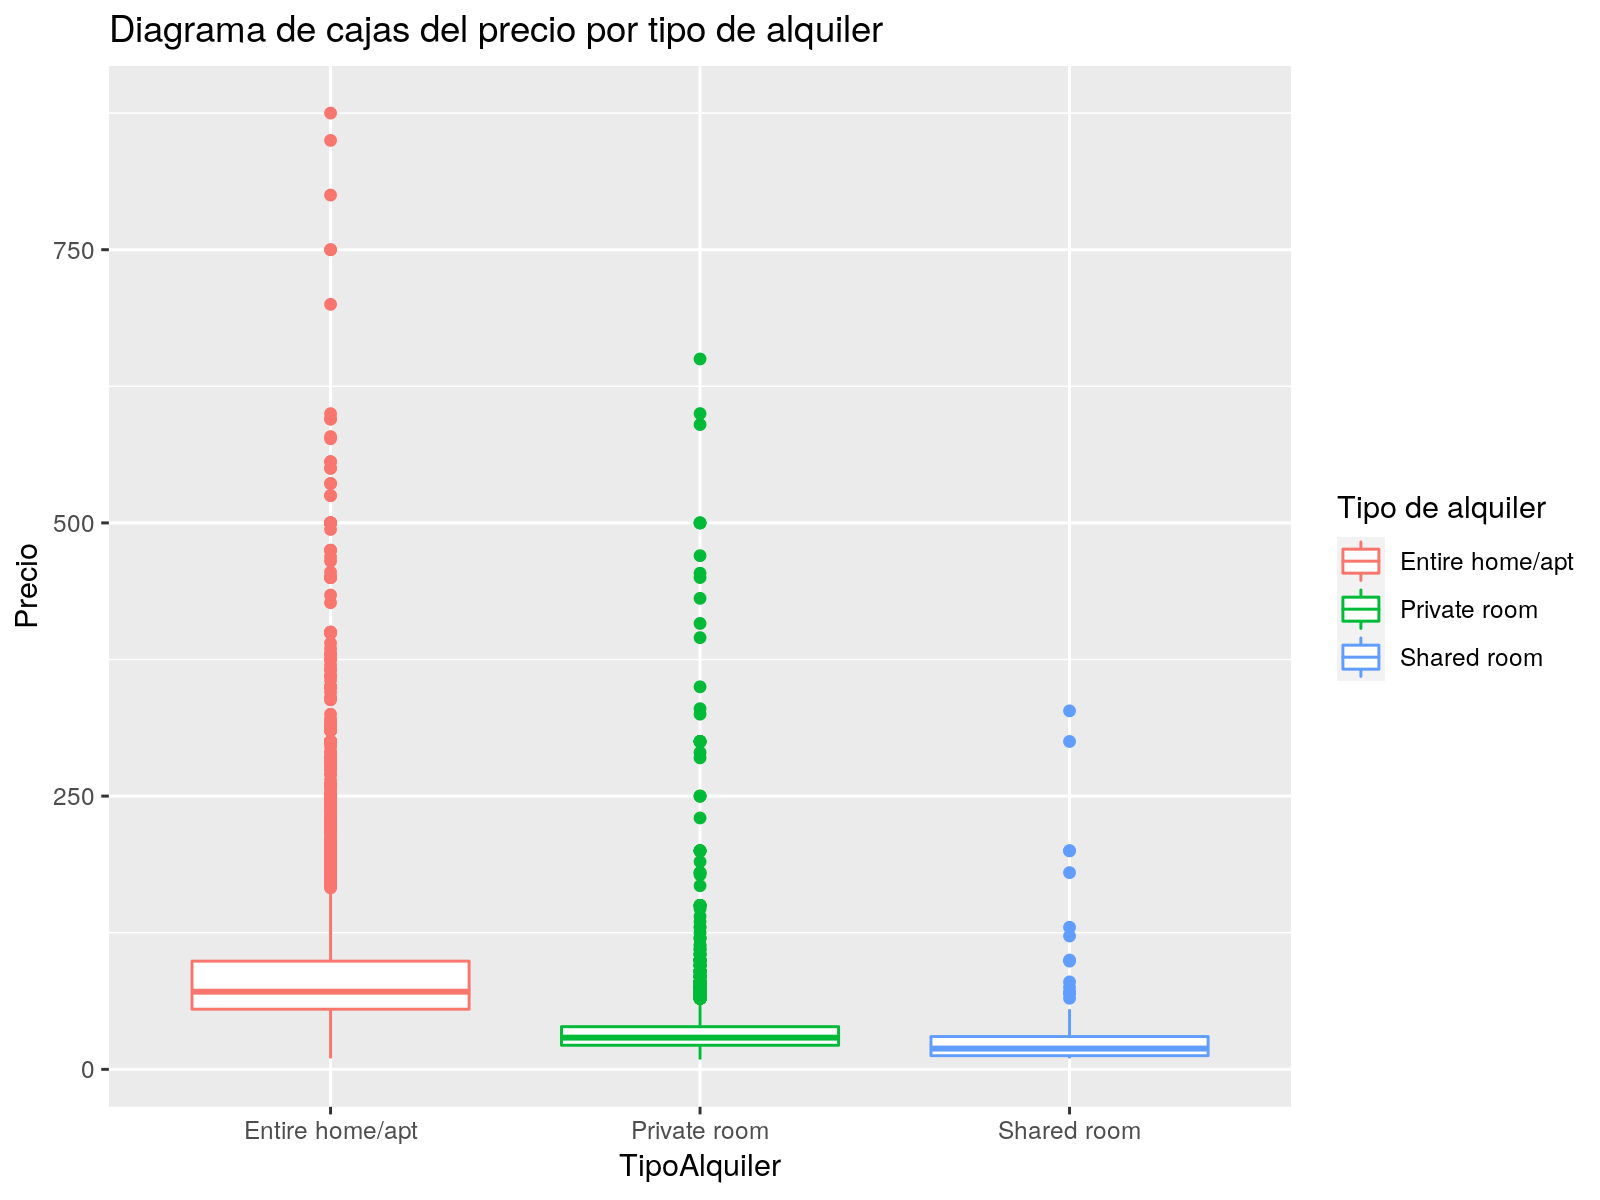

In [233]:
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)
ggplot(data=airbnb, aes(x=TipoAlquiler, y=Precio , color=TipoAlquiler))+
    geom_boxplot()+
    scale_color_discrete(name="Tipo de alquiler")+ ggtitle("Diagrama de cajas del precio por tipo de alquiler ")


Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

[1] "El precio medio de Entire home/apt es de:  87.3 Euros, y la varianza: 3415.31"

[1] "El precio medio de Private room es de:  34.26 Euros, y la varianza: 1005.76"

[1] "El precio medio de Shared room es de:  29.85 Euros, y la varianza: 1651.87"

[1] "Tras visualizar las siguientes gráficas comprobamos que los precios por tipo de alquiler no siguen una distribución normal por lo que realizamos un test de Kruskal-Wallis"

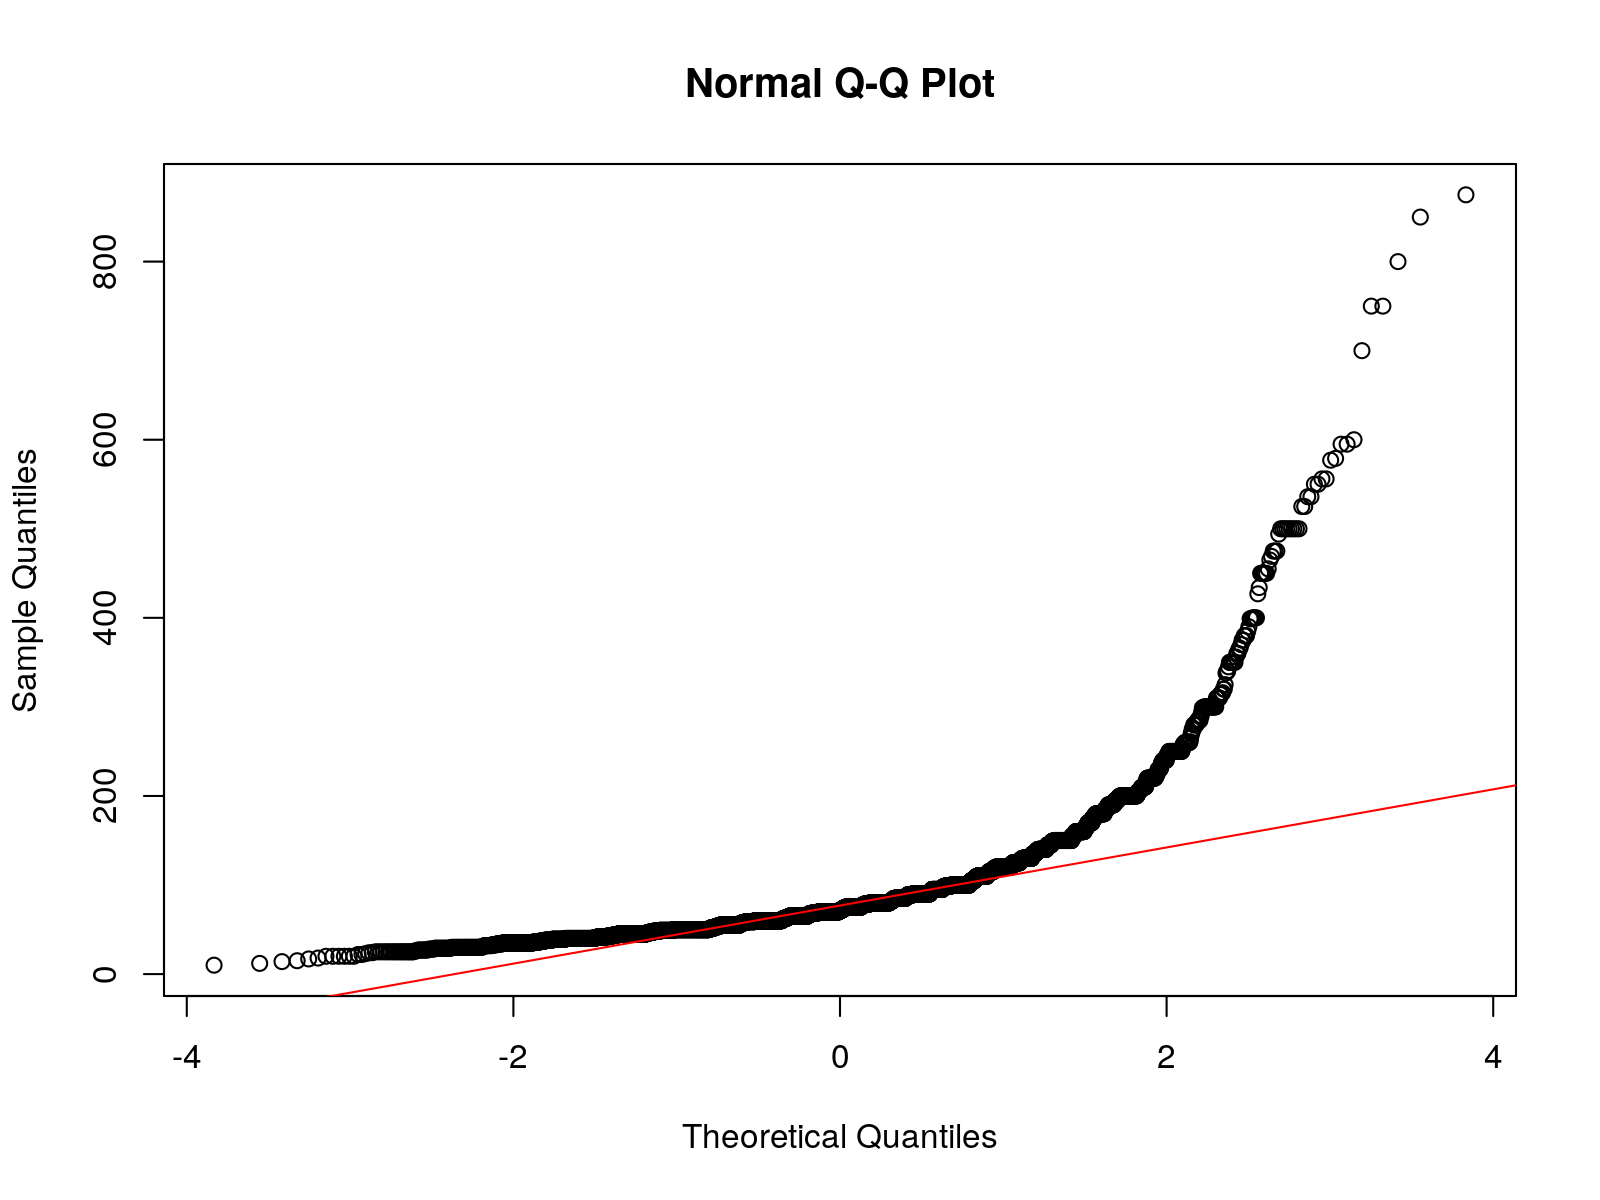

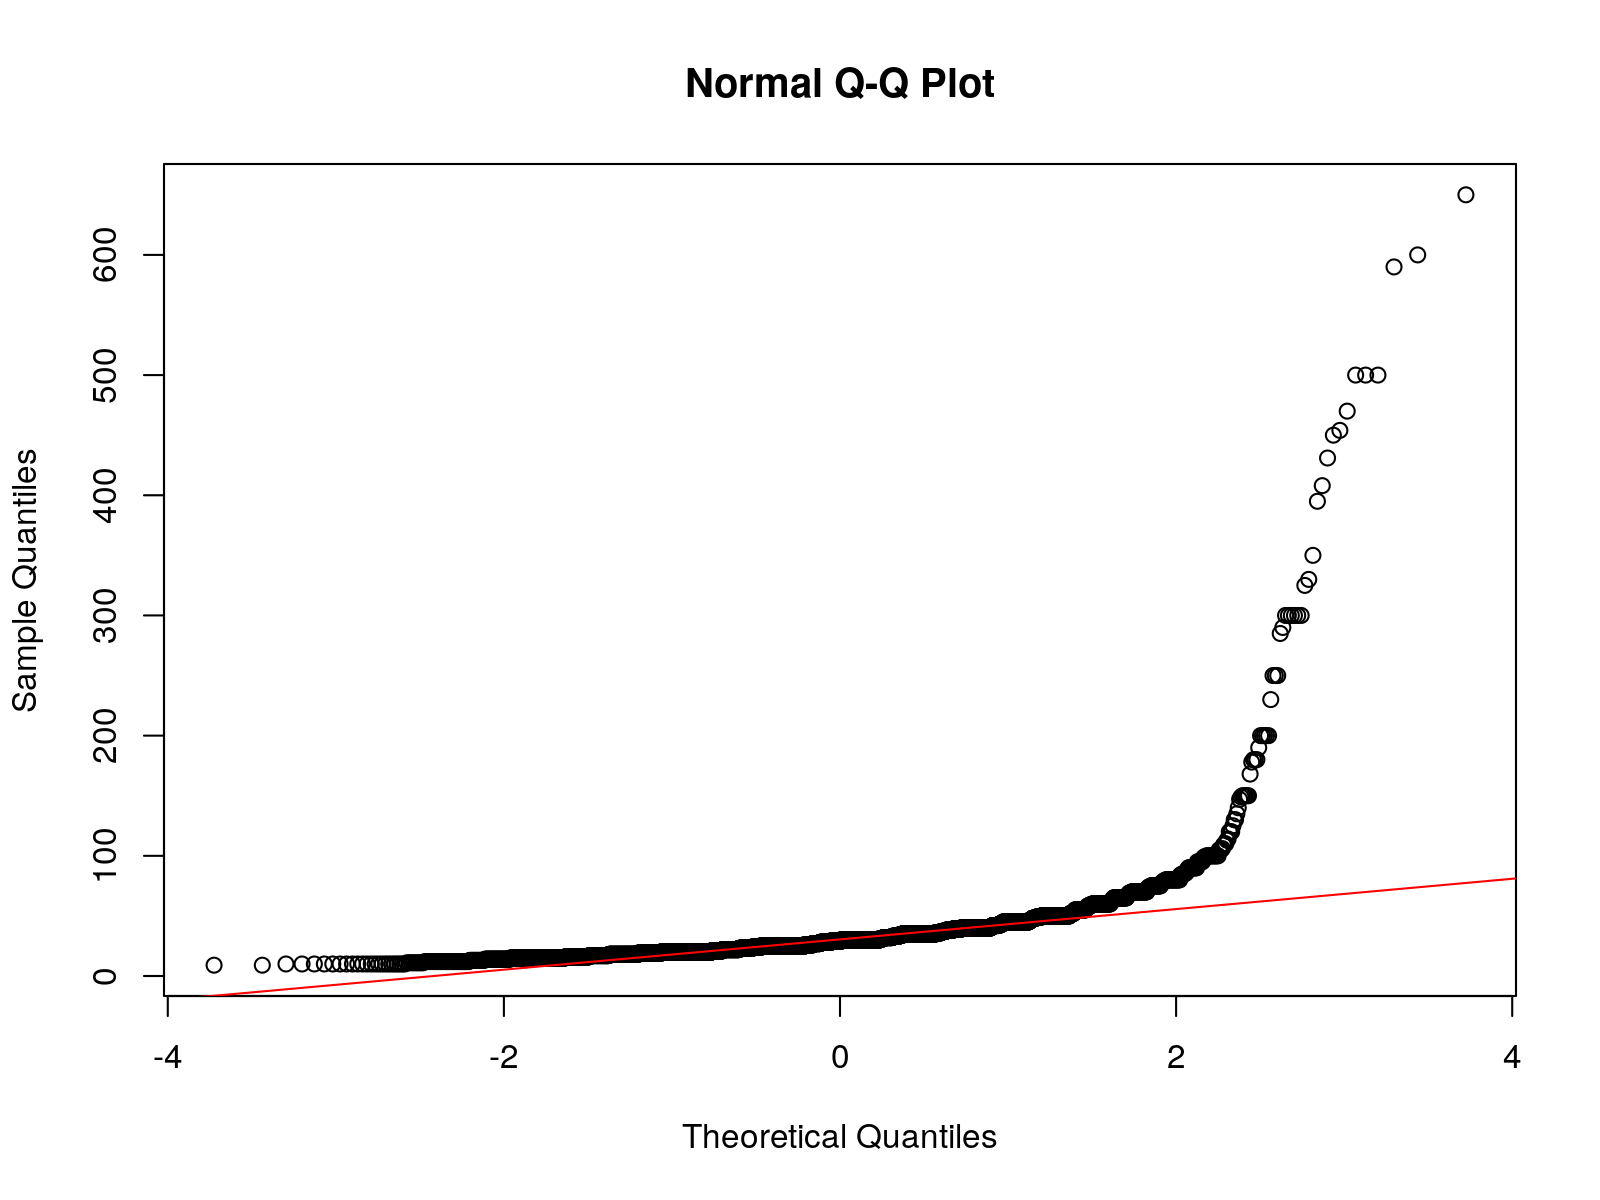


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Tras realizar el test de Kruskal-Wallis obtenemos un p-value prácticamente igual a 0 por lo que la diferencia de medias es estadísticamente significativa"

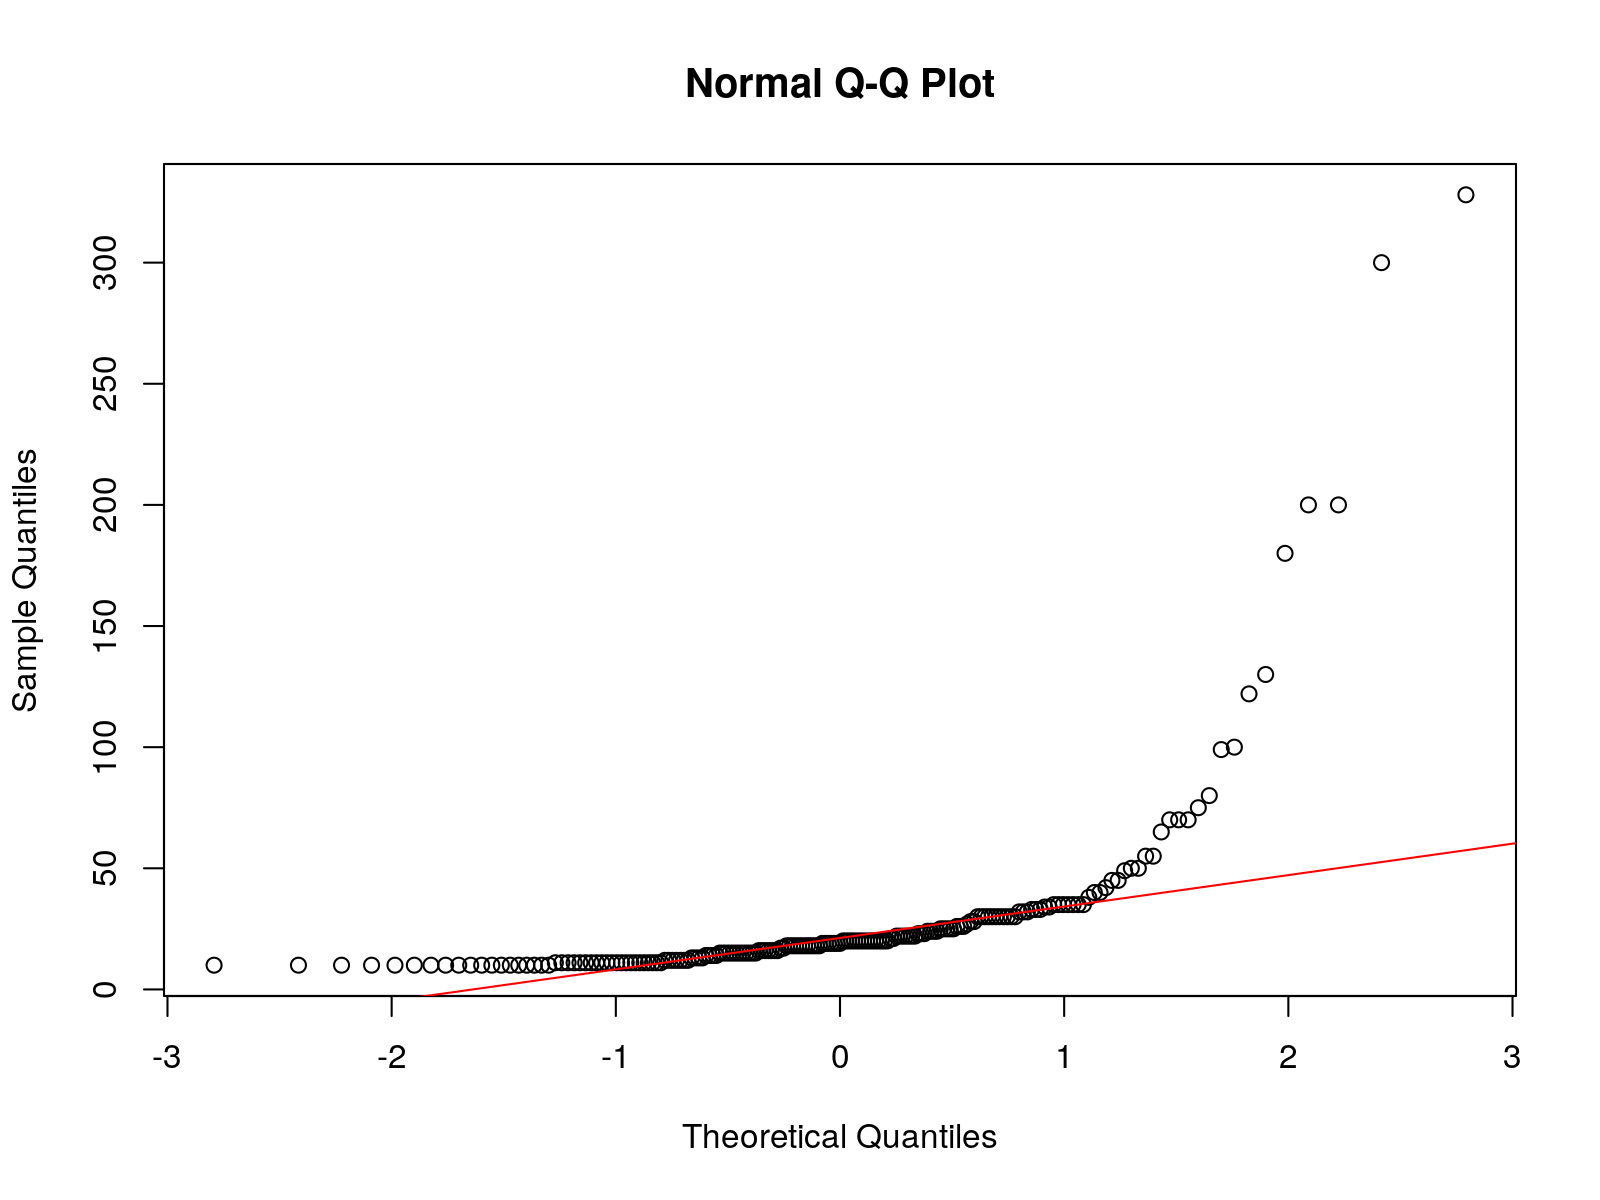

In [234]:
preciosEntireHome <- airbnb[airbnb$TipoAlquiler =="Entire home/apt", "Precio"]
preciosPrivateRoom <- airbnb[airbnb$TipoAlquiler =="Private room", "Precio"]
preciosSharedRoom <- airbnb[airbnb$TipoAlquiler =="Shared room", "Precio"]
paste("El precio medio de Entire home/apt es de: ", round(mean(preciosEntireHome,na.rm = TRUE),2),"Euros, y la varianza:",round(var(preciosEntireHome,na.rm = TRUE),2))
paste("El precio medio de Private room es de: ", round(mean(preciosPrivateRoom,na.rm = TRUE),2),"Euros, y la varianza:",round(var(preciosPrivateRoom,na.rm = TRUE),2))
paste("El precio medio de Shared room es de: ", round(mean(preciosSharedRoom,na.rm = TRUE),2),"Euros, y la varianza:",round(var(preciosSharedRoom,na.rm = TRUE),2))

paste("Tras visualizar las siguientes gráficas comprobamos que los precios por tipo de alquiler no siguen una distribución normal por lo que realizamos un test de Kruskal-Wallis")
qqnorm(preciosEntireHome)
qqline(preciosEntireHome, col="red")
qqnorm(preciosPrivateRoom)
qqline(preciosPrivateRoom, col="red")
qqnorm(preciosSharedRoom)
qqline(preciosSharedRoom, col="red")

kruskalTest <- kruskal.test( Precio ~ TipoAlquiler, data=airbnb)
kruskalTest
paste("Tras realizar el test de Kruskal-Wallis obtenemos un p-value prácticamente igual a 0 por lo que la diferencia de medias es estadísticamente significativa")




Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [235]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=='Entire home/apt',]


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [236]:
paste("Los Barrios que tienen mayor número de apartamentos enteros para alquilar son: ")
  head(summary(airbnb_entire$Barrio),5)

[1] "Los Barrios que tienen mayor número de apartamentos enteros para alquilar son: "

Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [237]:
dfPrecioBarrio <- aggregate(airbnb_entire$Precio,list(airbnb_entire$Barrio),mean,na.rm=TRUE) 

colnames(dfPrecioBarrio) <- c("Barrio","Precio Medio")
BarriosMayorPrecio <- dfPrecioBarrio[order(dfPrecioBarrio$`Precio Medio`,decreasing = TRUE),c("Barrio","Precio Medio")][1:5,]

paste("Los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son:")
BarriosMayorPrecio

[1] "Los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son:"

,Barrio,Precio Medio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [238]:
dfFrecBarrio <- aggregate(airbnb_entire$Barrio,list(airbnb_entire$Barrio),length) 
colnames(dfFrecBarrio) <- c("Barrio","Freq")
dfPrecioFreq <- merge(dfPrecioBarrio,dfFrecBarrio, by = "Barrio")
head(dfPrecioFreq[order(dfPrecioFreq$Freq, decreasing = TRUE),],5)


,Barrio,Precio Medio,Freq
,<fct>,<dbl>,<int>
45,Embajadores,73.70497,1228
109,Universidad,79.39674,984
76,Palacio,93.30599,769
106,Sol,100.75036,701
39,Cortes,94.39373,574


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [239]:
dfPrecioFreqFiltre <- dfPrecioFreq[dfPrecioFreq$Freq > 100,]
dfPrecioFreqFiltreTopFive <-  dfPrecioFreqFiltre[order(dfPrecioFreqFiltre$`Precio Medio`, decreasing = TRUE),]
paste("Los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler:")
dfPrecioFreqFiltreTopFive[1:5,]

[1] "Los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler:"

,Barrio,Precio Medio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


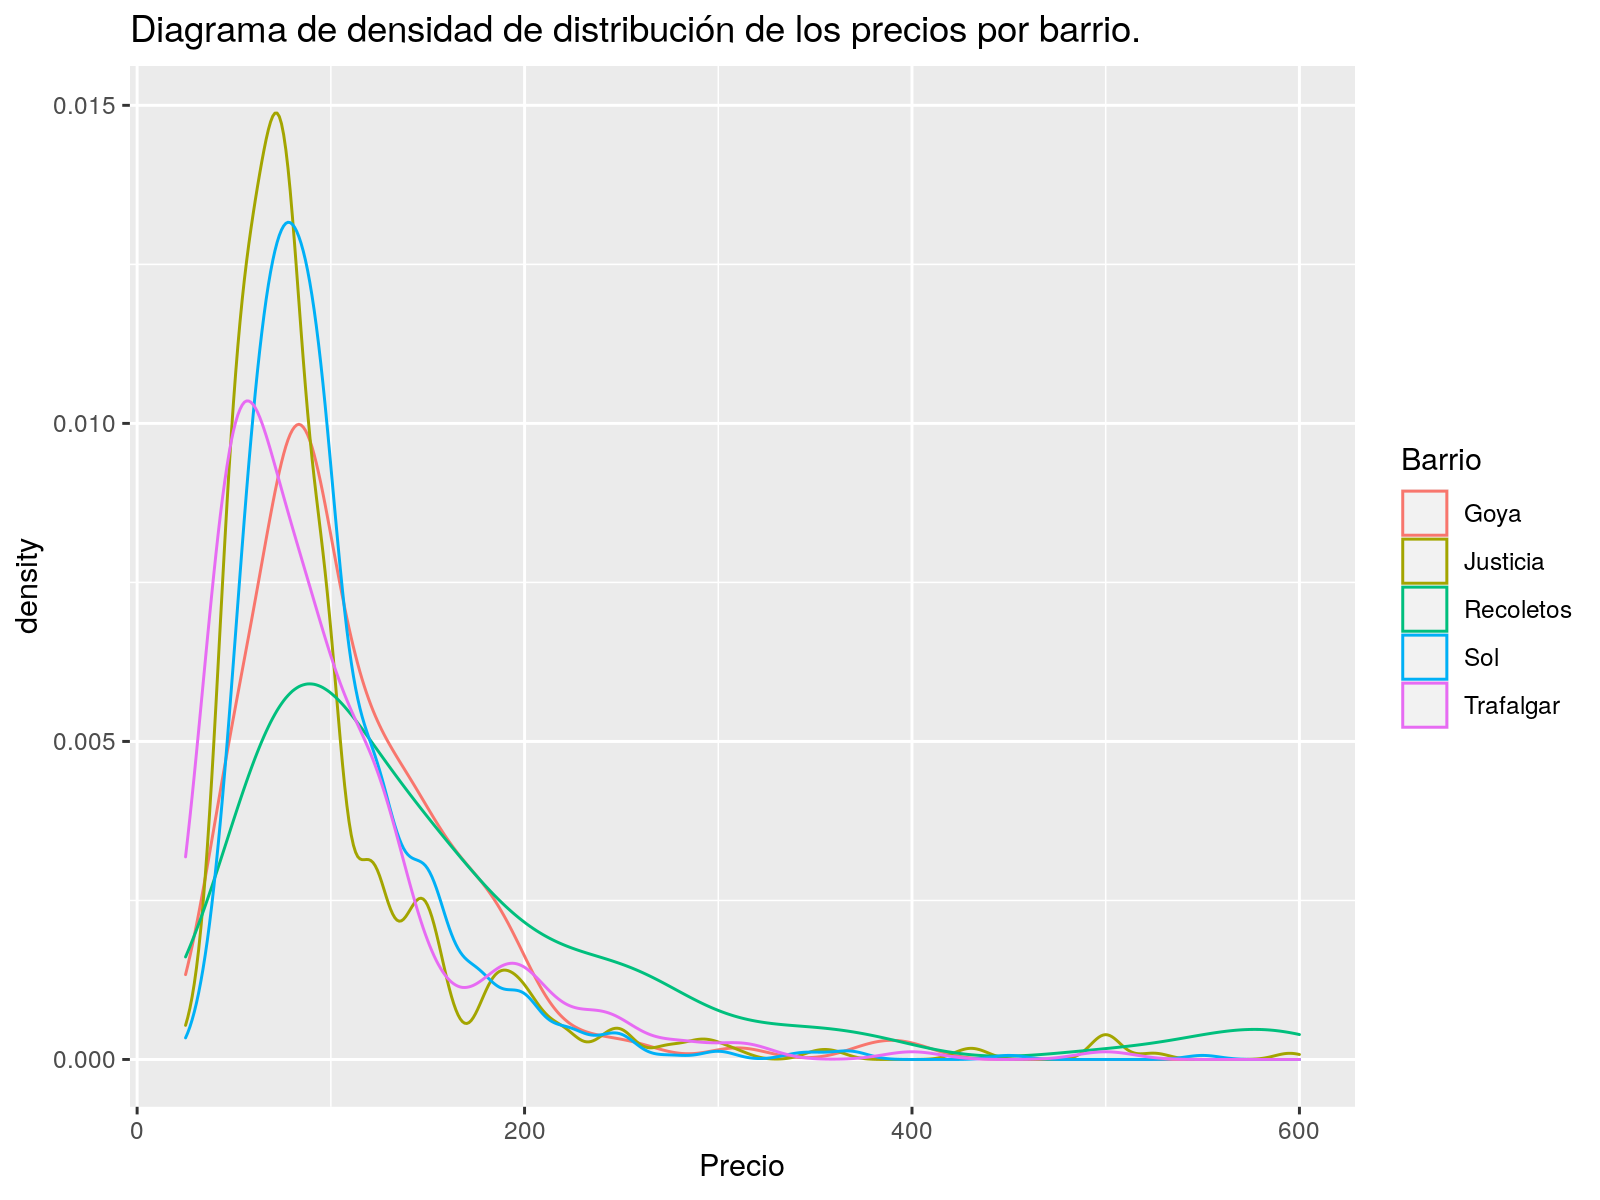

In [240]:
dfTopBarriosPrecio <- airbnb_entire [airbnb_entire$Barrio == "Recoletos" | airbnb_entire$Barrio == "Goya" | airbnb_entire$Barrio == "Sol" | airbnb_entire$Barrio == "Trafalgar" | airbnb_entire$Barrio == "Justicia",c("Barrio","Precio") ]
#Generamos las 5 graficas en el mismo canvas
ggplot(dfTopBarriosPrecio, aes(x=Precio, color=Barrio)) + 
geom_density() +
ggtitle("Diagrama de densidad de distribución de los precios por barrio.")


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [241]:
dfMetrosBarrio <- airbnb[airbnb$Barrio =="Justicia" | airbnb$Barrio =="Recoletos" | airbnb$Barrio =="Goya" | airbnb$Barrio =="Sol" | airbnb$Barrio =="Trafalgar", c("Barrio", "MetrosCuadrados")]
dfMetrosBarrio <- na.omit(dfMetrosBarrio)
dfMetrosBarrio <- aggregate(dfMetrosBarrio$MetrosCuadrados,list(dfMetrosBarrio$Barrio),mean) 
colnames(dfMetrosBarrio) <- c("Barrio", "MediaMetros")
dfTotal <- merge(dfPrecioFreqFiltreTopFive,dfMetrosBarrio, by = "Barrio")
dfTotal

Barrio,Precio Medio,Freq,MediaMetros
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,50.40917
Justicia,98.25468,534,28.12251
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,41.40285
Trafalgar,98.57848,223,48.51395


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


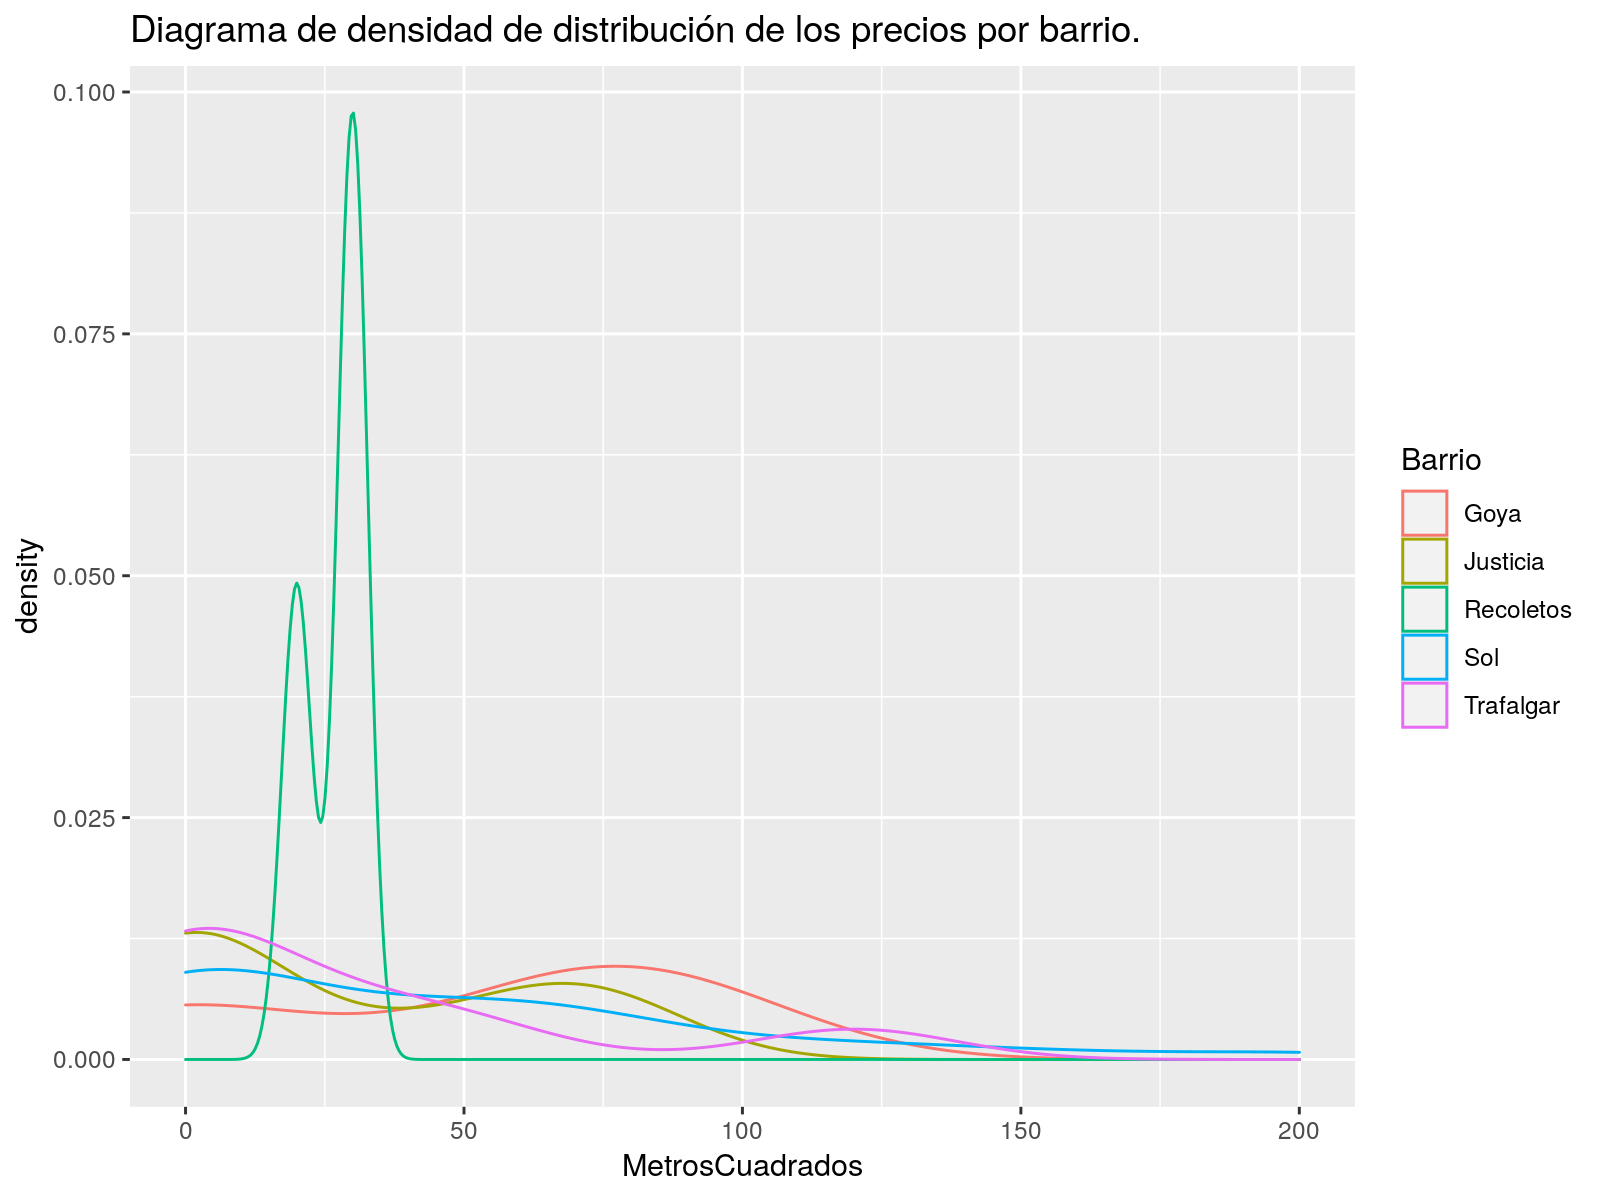

In [242]:
dfTopBarriosMetros <- airbnb_entire[airbnb_entire$Barrio == "Recoletos" | airbnb_entire$Barrio == "Goya" | airbnb_entire$Barrio == "Sol" | airbnb_entire$Barrio == "Trafalgar" | airbnb_entire$Barrio == "Justicia",c("Barrio","MetrosCuadrados") ]

ggplot(dfTopBarriosMetros, aes(x=MetrosCuadrados, color=Barrio)) + 
geom_density() +
ggtitle("Diagrama de densidad de distribución de los precios por barrio.")


Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [243]:
#Creamos variables que almacenan el vector de los metros cuadrados para cada barrio
dfTopBarriosMetros <- airbnb_entire [airbnb_entire$Barrio == "Recoletos" | airbnb_entire$Barrio == "Goya" | airbnb_entire$Barrio == "Sol" | airbnb_entire$Barrio == "Trafalgar" | airbnb_entire$Barrio == "Justicia",c("Barrio","MetrosCuadrados") ]
metrosRecoletos <- dfTopBarriosMetros[dfTopBarriosMetros$Barrio == "Recoletos", "MetrosCuadrados"]
metrosGoya <- dfTopBarriosMetros[dfTopBarriosMetros$Barrio == "Goya", "MetrosCuadrados"]
metrosSol <- dfTopBarriosMetros[dfTopBarriosMetros$Barrio == "Sol", "MetrosCuadrados"]
metrosTrafalgar <- dfTopBarriosMetros[dfTopBarriosMetros$Barrio == "Trafalgar", "MetrosCuadrados"]
metrosJusticia <- dfTopBarriosMetros[dfTopBarriosMetros$Barrio == "Justicia", "MetrosCuadrados"]

#Realizamos test de shapiro para ver si siguen una distribución normal
paste("Test de shapiro barrio Recoletos -> p-valor = ",shapiro.test(metrosRecoletos)$p.value)
paste("Test de shapiro barrio Recoletos -> p-valor = ",shapiro.test(metrosGoya)$p.value)
paste("Test de shapiro barrio Recoletos -> p-valor = ",shapiro.test(metrosTrafalgar)$p.value)
paste("Test de shapiro barrio Recoletos -> p-valor = ",shapiro.test(metrosJusticia)$p.value)
paste("Test de shapiro barrio Recoletos -> p-valor = ",shapiro.test(metrosSol)$p.value)

#Hacemos el test de Kruskal descartando el barrio de Goya
dfTopBarriosMetros2 <- airbnb_entire [airbnb_entire$Barrio == "Recoletos" | airbnb_entire$Barrio == "Sol" | airbnb_entire$Barrio == "Trafalgar" | airbnb_entire$Barrio == "Justicia",c("Barrio","MetrosCuadrados") ]
kruskal.test(MetrosCuadrados ~ Barrio, data=dfTopBarriosMetros2)

paste("Utilizamos un kruskal.test sin tener en cuenta el barrio de Goya (distribución normal). En cuanto a las otras medias, podemos asumir que son estadisticamente iguales")




[1] "Test de shapiro barrio Recoletos -> p-valor =  0"

[1] "Test de shapiro barrio Recoletos -> p-valor =  0.519924091564745"

[1] "Test de shapiro barrio Recoletos -> p-valor =  0.0127581397426826"

[1] "Test de shapiro barrio Recoletos -> p-valor =  0.00064192630271212"

[1] "Test de shapiro barrio Recoletos -> p-valor =  8.6913775134728e-07"


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.5337, df = 3, p-value = 0.6745


[1] "Utilizamos un kruskal.test sin tener en cuenta el barrio de Goya (distribución normal). En cuanto a las otras medias, podemos asumir que son estadisticamente iguales"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [244]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [245]:
cor(barrio_sol[,c("MaxOcupantes","MetrosCuadrados","NumDormitorios","NumBanyos")], use = "pairwise.complete.obs")

,MaxOcupantes,MetrosCuadrados,NumDormitorios,NumBanyos
MaxOcupantes,1.0000000,0.4286233,0.7594598,0.6578162
MetrosCuadrados,0.4286233,1.0000000,0.5684521,0.4820549
NumDormitorios,0.7594598,0.5684521,1.0000000,0.6761906
NumBanyos,0.6578162,0.4820549,0.6761906,1.0000000


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 641 rows containing missing values”
Warning message:
“Removed 641 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 641 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 641 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 641 rows containing missing values”
Warning message:
“Removed 641 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 641 rows containing non-finite values (stat_density2d).”


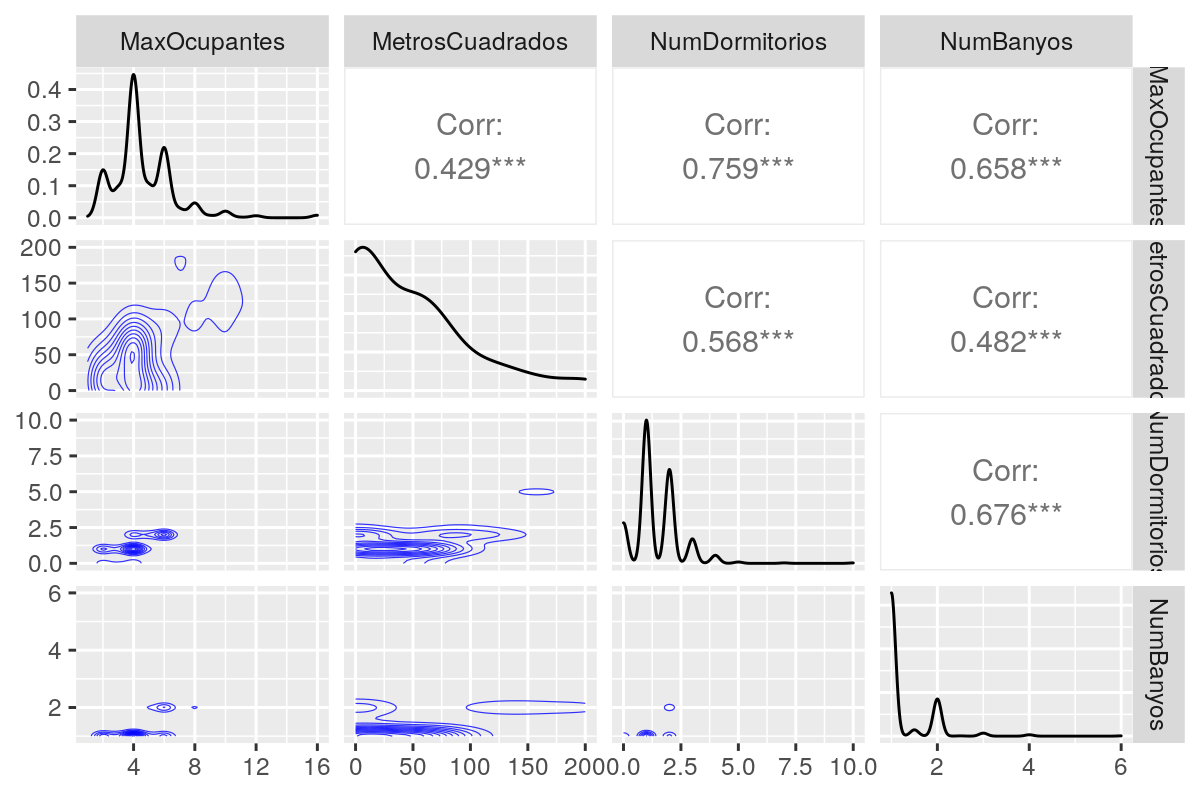

In [246]:
#Con ggpairs de la libreria GGally comprobamos en un mismo gráfico las correlaciones y las curvas de densidades
library(GGally)
options(repr.plot.height=4,repr.plot.width=6)
ggpairs(barrio_sol[,c("MaxOcupantes","MetrosCuadrados","NumDormitorios","NumBanyos")],
       lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       )

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


In [247]:
#Al observar la curva de densidad de Metros cuadrados observamos que existen bastantes
# filas que son cero por lo que las descartamos
barrio_sol[which(barrio_sol$MetrosCuadrados == 00), "MetrosCuadrados"] <- NA
 

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 661 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 661 rows containing missing values”
Warning message:
“Removed 661 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 661 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 661 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 661 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 661 rows containing missing values”
Warning message:
“Removed 661 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 661 rows containing non-finite values (stat_density2d).”


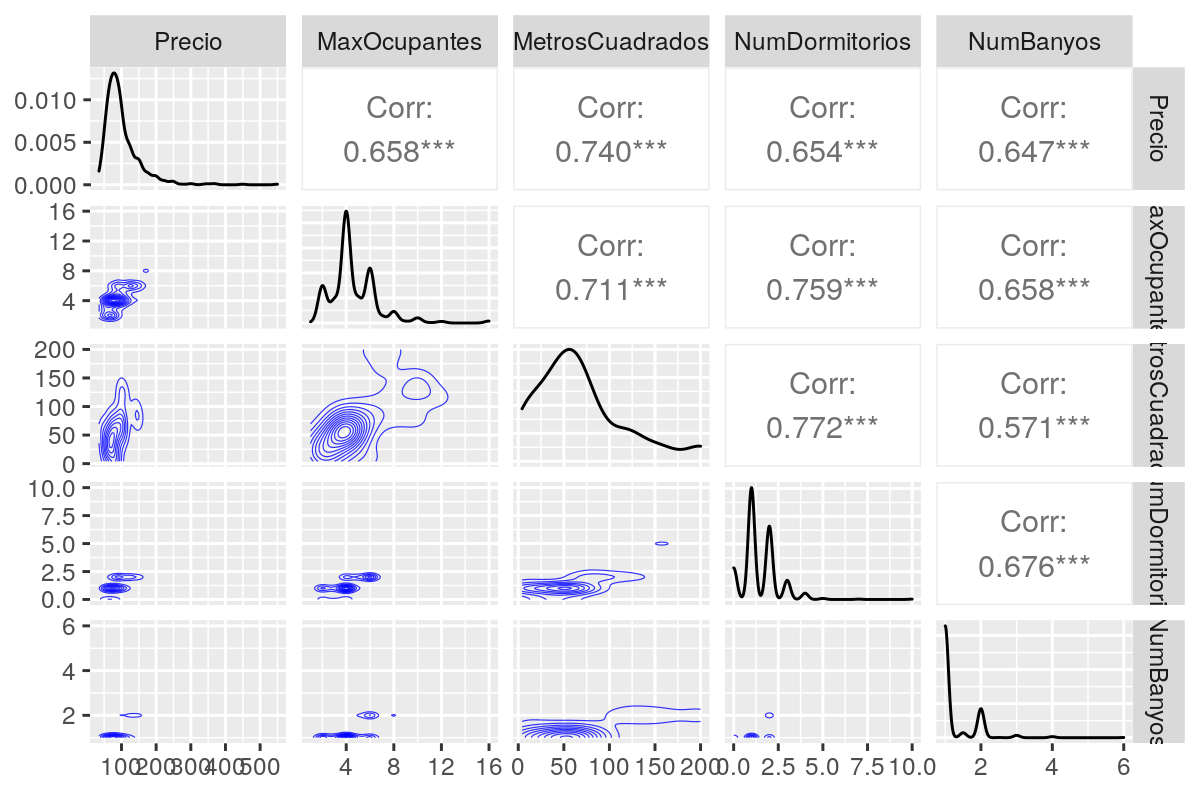

In [248]:
#Volvemos a comprobar correlaciones y curvas de densidad
options(repr.plot.height=4,repr.plot.width=6)
ggpairs(barrio_sol[,c("Precio","MaxOcupantes","MetrosCuadrados","NumDormitorios","NumBanyos")],
       lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [249]:
#generamos un modelo de regresión lineal 
model <- lm(data=barrio_sol, formula=  Precio ~ MaxOcupantes+MetrosCuadrados+NumDormitorios+NumBanyos)
summary(model)
confint(model)


Call:
lm(formula = Precio ~ MaxOcupantes + MetrosCuadrados + NumDormitorios + 
    NumBanyos, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.612 -15.964  -2.284  15.983  69.387 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.5859    10.7807   3.023 0.004666 ** 
MaxOcupantes      1.9376     3.9943   0.485 0.630634    
MetrosCuadrados   0.1880     0.1578   1.192 0.241398    
NumDormitorios   29.8080     7.3856   4.036 0.000281 ***
NumBanyos         0.7013    13.4708   0.052 0.958778    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.48 on 35 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7284 
F-statistic: 27.14 on 4 and 35 DF,  p-value: 2.666e-10


,2.5 %,97.5 %
(Intercept),10.6998124,54.4719482
MaxOcupantes,-6.1712382,10.0464244
MetrosCuadrados,-0.1322696,0.5082809
NumDormitorios,14.8145234,44.8015624
NumBanyos,-26.6459428,28.0484866


In [250]:
#aplicamos la funcion stepAIC para que nos optimice la regresion lineal
library(MASS)
modelOptim<-stepAIC(model,trace=FALSE)
summary(model)
summary(modelOptim)

paste("Aplicando la función stepAIC obtenemos un modelo en el que combina el numero de dormitorios y los metros cuadrados con un error cuadratico de 0.7562")


Call:
lm(formula = Precio ~ MaxOcupantes + MetrosCuadrados + NumDormitorios + 
    NumBanyos, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.612 -15.964  -2.284  15.983  69.387 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.5859    10.7807   3.023 0.004666 ** 
MaxOcupantes      1.9376     3.9943   0.485 0.630634    
MetrosCuadrados   0.1880     0.1578   1.192 0.241398    
NumDormitorios   29.8080     7.3856   4.036 0.000281 ***
NumBanyos         0.7013    13.4708   0.052 0.958778    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.48 on 35 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7284 
F-statistic: 27.14 on 4 and 35 DF,  p-value: 2.666e-10



Call:
lm(formula = Precio ~ MetrosCuadrados + NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.134 -16.183  -0.823  15.801  68.085 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.8284     7.9805   4.615 4.61e-05 ***
MetrosCuadrados   0.2153     0.1449   1.486    0.146    
NumDormitorios   32.5581     5.8817   5.535 2.67e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.88 on 37 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7393 
F-statistic: 56.31 on 2 and 37 DF,  p-value: 5.952e-12


[1] "Aplicando la función stepAIC obtenemos un modelo en el que combina el numero de dormitorios y los metros cuadrados con un error cuadratico de 0.7562"

In [251]:
#Comprobamos como es la reg. lineal unicamente relacionando el precio y el num dormitorios
paste("A continuación se muestsa un modelo relacionando unicamente el precio con el número de dormitorios")
modelDormitorio <- lm(data=barrio_sol, formula=  Precio ~ NumDormitorios)
sumModelDormitorio <- summary(modelDormitorio)
sumModelDormitorio
confInDormitorio <- confint(modelDormitorio)
paste("Obtenemos un error cuadratico de ,",sumModelDormitorio$r.squared)





[1] "A continuación se muestsa un modelo relacionando unicamente el precio con el número de dormitorios"


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-206.225  -22.676   -4.312   16.416  263.960 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.584      2.568   20.48   <2e-16 ***
NumDormitorios   33.364      1.459   22.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.9 on 699 degrees of freedom
Multiple R-squared:  0.4281,	Adjusted R-squared:  0.4272 
F-statistic: 523.1 on 1 and 699 DF,  p-value: < 2.2e-16


[1] "Obtenemos un error cuadratico de , 0.428050003910167"

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

Respuesta : Número de habitaciones

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [252]:
#Creamos un modelo lineal combinadolo solo con metros cuadrados
modelMetros <- lm(data=barrio_sol, formula=  Precio ~ MetrosCuadrados)
sumModelMetros <- summary(modelMetros)
confIntMetros <- confint(modelMetros)
paste("El precio se incremente en ",round(sumModelMetros$coefficients[2,1],2)," euros por cada metro cuadrado extra, con un margen de error del 95 % de ,",round(confIntMetros[2,1],2)," a ",round(confIntMetros[2,2],2),"€.")
paste("Error cuadratico =", round(sumModelMetros$r.squared,4))

[1] "El precio se incremente en  0.83  euros por cada metro cuadrado extra, con un margen de error del 95 % de , 0.59  a  1.08 €."

[1] "Error cuadratico = 0.5479"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [255]:
#Tomamos el modelo sumModelDormitorio creado dos preguntas atrás
paste("El precio se incrementa en ",round(sumModelDormitorio$coefficients[2,1],2),"€ por cada metro cuadrado extra, con un margen de error del 95%: de",round(confInDormitorio[2,1],2),"€ a ",round(confInDormitorio[2,2],2),"€.")
paste("Error cuadratico =", round(sumModelDormitorio$r.squared,4))
paste("se observa que en el modelo que se tiene en cuenta solo el número de habitacines el error cuadratico medio disminuye, por lo tanto el modelo es un poco mas robusto")

[1] "El precio se incrementa en  33.36 € por cada metro cuadrado extra, con un margen de error del 95%: de 30.5 € a  36.23 €."

[1] "Error cuadratico = 0.4281"

[1] "se observa que en el modelo que se tiene en cuenta solo el número de habitacines el error cuadratico medio disminuye, por lo tanto el modelo es un poco mas robusto"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [254]:
totalAlquileresFiltro <- length(barrio_sol$NumDormitorio[barrio_sol$NumDormitorio == 3])
totalAlquileres <- length(barrio_sol$NumDormitorio)
probabilidad <- round((totalAlquileresFiltro/totalAlquileres)*100,2)
testConfianza <- binom.test(totalAlquileresFiltro,totalAlquileres)

paste("La probabilidad de encontrar en el barrio de Sol un apartamento con 3 habitaciones es de un ",probabilidad,"%.")
paste("Con el siguiente intervalo de confianza: de ", round(testConfianza$conf.int[1]*100,2),"%"," a ",round(testConfianza$conf.int[2]*100,2),"%.")

[1] "La probabilidad de encontrar en el barrio de Sol un apartamento con 3 habitaciones es de un  7.85 %."

[1] "Con el siguiente intervalo de confianza: de  5.97 %  a  10.09 %."